In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# %env SPOTIFY_CLIENT_ID=6f64c4b782b144be978a4424fc7b3207
# %env SPOTIFY_CLIENT_SECRET=1d648e1fc23946f7bbfee77250619e77
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="6f64c4b782b144be978a4424fc7b3207",
    client_secret="1d648e1fc23946f7bbfee77250619e77"
))
import os
os.environ['SPOTIPY_CLIENT_ID'] = '6f64c4b782b144be978a4424fc7b3207'
os.environ['SPOTIPY_CLIENT_SECRET'] = '1d648e1fc23946f7bbfee77250619e77'
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://localhost:8888/callback'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())


import warnings
warnings.filterwarnings('ignore')

In [2]:
tracks = pd.read_csv('tracks_records.csv')
tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],NaN,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],NaN,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [3]:
tracks[tracks['artists'] == 'Justin Bieber' ]

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
82248,6eDApnV9Jdb1nYahOlbbUh,One Time,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2009,215.867,71,0.691,0.853,1,57.472,0,0.0372,0.06310,0.000071,0.082,0.762,145.999
82299,69ghzc538EQSVon2Gm3wrr,One Less Lonely Girl,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2009,229.107,69,0.580,0.750,4,55.579,1,0.1940,0.15900,0.000000,0.274,0.728,86.938
82372,0yIywEquxORnu1dR0WYsdN,Love Me,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2009,191.573,67,0.729,0.868,3,56.681,1,0.0609,0.00939,0.000000,0.283,0.632,124.957
83046,4nTjkWK590oBDcnIxTr1mI,Favorite Girl,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2009,256.800,58,0.581,0.681,7,55.531,1,0.0435,0.04720,0.000000,0.104,0.634,176.034
83249,0aPZbnkMoWJaJ5CNVLCj8S,That Should Be Me,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2010,232.720,70,0.552,0.603,8,54.290,1,0.0334,0.19900,0.000000,0.151,0.231,139.908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583293,0x7b1iQcJchYV55o1rUrs4,Love Me,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2010,191.573,49,0.712,0.868,5,56.681,0,0.0656,0.00939,0.000000,0.283,0.652,125.028
583312,4pYlyrBINcwbsBAemZ44CF,One Less Lonely Girl,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2010,229.107,47,0.555,0.750,4,55.576,1,0.2040,0.15900,0.000000,0.274,0.726,86.840
583320,6LtrSXoBzbTF3SxcJb1Fnm,Somebody To Love,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2010,220.920,49,0.719,0.840,5,54.765,1,0.0257,0.00241,0.000000,0.228,0.636,129.974
583333,1sZjOcNqpo7T6hDf1qFACC,That Should Be Me,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],canadian pop pop postteen pop,2010,232.733,46,0.542,0.607,8,54.263,1,0.0336,0.21000,0.000000,0.169,0.226,139.954


In [4]:
tracks.shape

(586672, 19)

In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   artists           586601 non-null  object 
 3   id_artists        586672 non-null  object 
 4   genres            536847 non-null  object 
 5   release_year      586672 non-null  int64  
 6   duration_s        586672 non-null  float64
 7   popularity        586672 non-null  int64  
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
tracks.isnull().sum()

id                      0
name                   71
artists                71
id_artists              0
genres              49825
release_year            0
duration_s              0
popularity              0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
dtype: int64

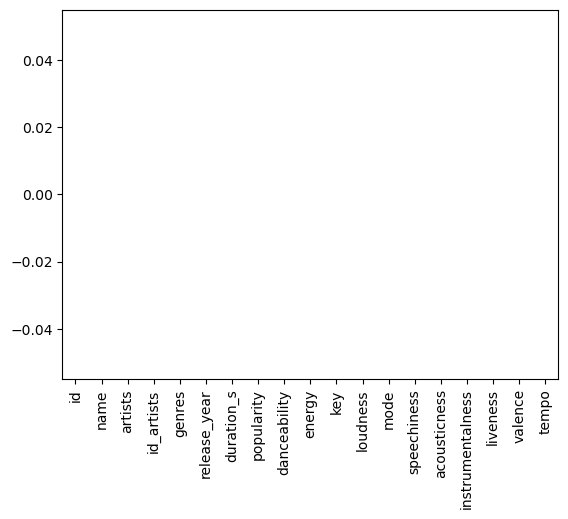

In [7]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [8]:
# tracks = tracks.drop(['id', 'id_artists'], axis = 1)

In [9]:
# model = TSNE(n_components = 2, random_state = 0)
# tsne_data = model.fit_transform(tracks.head(500))
# plt.figure(figsize = (7, 7))
# plt.scatter(tsne_data[:,0], tsne_data[:,1])
# plt.show()

In [10]:
tracks['name'].nunique(), tracks.shape

(408902, (536847, 19))

In [11]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)

In [12]:
# plt.figure(figsize = (10, 5))
# sb.countplot(tracks['release_year'])
# plt.axis('off')
# plt.show()

In [13]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)

len(floats)

10

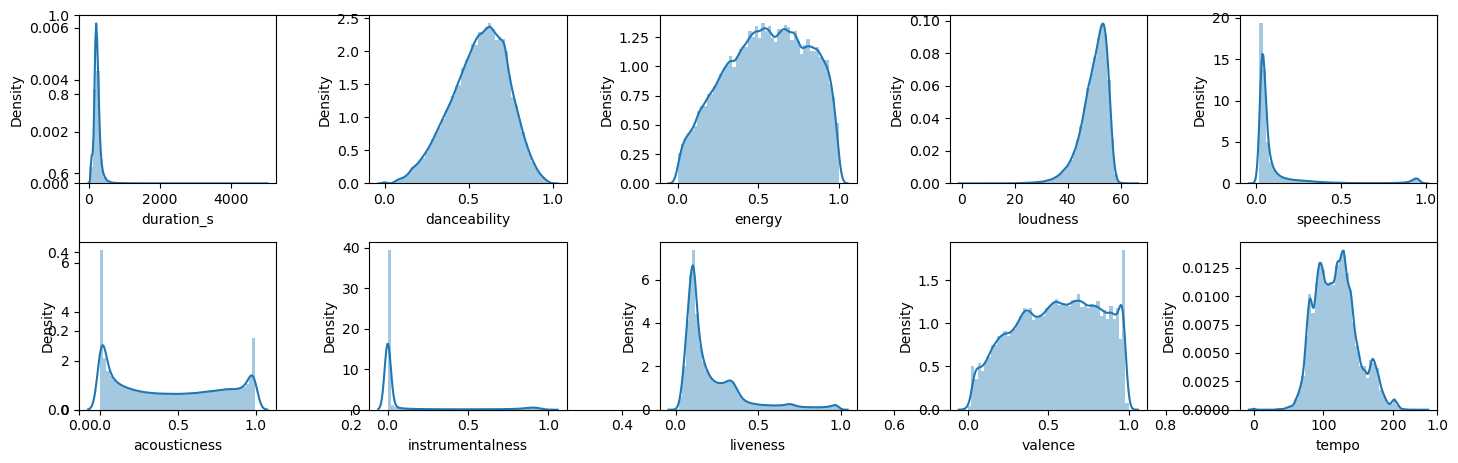

In [14]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [15]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genres'])

In [16]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

In [17]:
def get_average_vector(song_names, data):
    text_vectors = []
    num_vectors = []

    # Collect vectors for all songs in the playlist
    for song_name in song_names:
        if song_name not in data['name'].values:
            continue

        # Transform the genre and numeric data for each song
        text_vector = song_vectorizer.transform(data[data['name'] == song_name]['genres']).toarray()
        num_vector = data[data['name'] == song_name].select_dtypes(include=np.number).to_numpy()

        if text_vector.size > 0 and num_vector.size > 0:
            text_vectors.append(text_vector[0])
            num_vectors.append(num_vector[0])

    # Compute the average vectors
    if not text_vectors or not num_vectors:
        print("No valid songs found for averaging.")
        return None, None

    avg_text_vector = np.mean(text_vectors, axis=0)
    avg_num_vector = np.mean(num_vectors, axis=0)

    return avg_text_vector, avg_num_vector


In [18]:
def get_similarities(song_list, data):
    sim = [0] * len(data)
    for song_name in song_list:
        # Getting vector for the input song.
        text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
        num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()

        # We will store similarity for each row of the dataset.
        for idx, row in data.iterrows():
            name = row['name']

            # Getting vector for current song.
            text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
            num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()

            # Calculating similarities for text as well as numeric features
            text_sim = cosine_similarity(text_array1, text_array2)[0][0]
            num_sim = cosine_similarity(num_array1, num_array2)[0][0]
            sim[idx] += text_sim + num_sim
    return sim


In [19]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists']][2:7])

In [20]:
def recommend_songs_for_playlist(song_names, data):
    avg_text_vector, avg_num_vector = get_average_vector(song_names, data)

    if avg_text_vector is None or avg_num_vector is None:
        print("Unable to generate recommendations due to missing data.")
        return

    # Calculate similarity with the average vector
    sim = []
    for idx, row in data.iterrows():
        name = row['name']
        text_vector = song_vectorizer.transform(data[data['name'] == name]['genres']).toarray()
        num_vector = data[data['name'] == name].select_dtypes(include=np.number).to_numpy()

        if text_vector.size == 0 or num_vector.size == 0:
            continue

        # Calculate cosine similarity with the averaged vector
        text_sim = cosine_similarity([avg_text_vector], text_vector)[0][0]
        num_sim = cosine_similarity([avg_num_vector], num_vector)[0][0]
        sim.append((name, text_sim + num_sim))

    # Sort and display the top recommendations
    sim.sort(key=lambda x: x[1], reverse=True)
    print("\nTop Recommendations for the Playlist:")
    result = []
    for song, score in sim[1:6]:  # Skip the first result as it's often the playlist itself
        artist = data[data['name'] == song]['artists'].values[0]
        print(f"{song} by {artist} - Similarity Score: {score:.2f}")
        song_id = data[data['name'] == song]['id'].values[0]
        result.append([f"{song} by {artist}", song_id])
    return result

In [21]:
artist = tracks[tracks['name'] == 'Shape of You']['artists'].values[0]
print(artist)


Ed Sheeran


In [22]:
# recommend_songs('Shape of You')

In [23]:
# recommend_songs('Love Someone')

In [24]:
# recommend_songs('Love me like you do')

In [25]:
# Function to extract song names from a Spotify playlist URL
def get_song_names(playlist_url):
    song_names = []
    playlist_id = playlist_url.split("/")[-1].split("?")[0]
    playlist_tracks = sp.playlist_tracks(playlist_id)

    for track in playlist_tracks['items']:
        if track['track']:  # Check if the track exists
            song_names.append(track['track']['name'])
        else:
            song_names.append("Unknown Track")  # Placeholder for missing tracks
    return song_names


In [26]:
# Example usage
playlist_url = 'https://open.spotify.com/playlist/6Eh4KE9fojcXtUrI58Gdh8?si=416c1841f2aa4876'
song_names = get_song_names(playlist_url)


In [27]:
# Display the extracted song names
for idx, song in enumerate(song_names, 1):
    print(f"{idx}. {song}")

1. There's Nothing Holdin' Me Back
2. Stitches
3. Treat You Better
4. Señorita
5. If I Can't Have You
6. Drag Me Down
7. Mercy
8. Youngblood
9. Closer
10. Attention
11. New Rules
12. Something Just Like This
13. Shape of You
14. What Makes You Beautiful
15. Galway Girl
16. Counting Stars
17. Payphone
18. Rockabye (feat. Sean Paul & Anne-Marie)
19. In the Name of Love
20. Let Me Love You
21. Girls Like You (feat. Cardi B) - Cardi B Version
22. How Long
23. Hall of Fame (feat. will.i.am)
24. Shut Up and Dance
25. The Nights
26. I Want It That Way
27. One More Night
28. Memories
29. Steal My Girl
30. Astronomy
31. Die With A Smile
32. Levitating
33. Houdini
34. Set Fire to the Rain
35. We Don't Talk Anymore (feat. Selena Gomez)
36. Thinking out Loud
37. Lobster
38. Don't Be A Fool
39. Three Empty Words
40. Patience
41. Happier
42. Never Not
43. comethru
44. At My Worst
45. Strawberries & Cigarettes
46. Stargazing
47. Moves Like Jagger
48. Moves Like Jagger - Studio Recording From "The Voi

In [28]:
# for idx, song in enumerate(song_names, 1):
#   print(f"Recommendations based on")

In [29]:
# # Example usage
# playlist_url = 'https://open.spotify.com/playlist/6Eh4KE9fojcXtUrI58Gdh8?si=416c1841f2aa4876'
# song_names = get_song_names(playlist_url)
# result = recommend_songs_for_playlist(song_names, data=tracks)
# print("here is your result")
# print(result)

In [30]:
print('https://open.spotify.com/track/1r299qCKBLgUS9XJ9m1kEx?si=6356a3c821804c60')

https://open.spotify.com/track/1r299qCKBLgUS9XJ9m1kEx?si=6356a3c821804c60


In [31]:
import tkinter as tk

# Function to handle recommendation button click
def recommend_music():
    url = url_entry.get()
    print(f"URL entered: {url}")
    song_names = get_song_names(url);
    result = recommend_songs_for_playlist(song_names, data=tracks)

    # Clear previous results
    for widget in result_frame.winfo_children():
        widget.destroy()

    # Display new results as clickable buttons
    for i, (song, song_id) in enumerate(result):
        song_name = song.split(' by ')[0]
        artist = song.split(' by ')[1]

        # Create a clickable button for each recommended song
        hyperlink = f"https://open.spotify.com/track/{song_id}"
        song_button = tk.Button(result_frame, text=f"{song_name} by {artist}",
                                fg="#232723",  # Text color (light green)
                                bg="#a8b2a8",  # Button color (darker green)
                                relief="raised",
                                cursor="hand2",
                                font=("Helvetica", 12, "bold"),
                                command=lambda url=hyperlink: open_link(url))
        song_button.pack(fill="x", pady=5, padx=10)

# Function to open URL in the web browser
def open_link(url):
    import webbrowser
    webbrowser.open(url)

# Create the main window
root = tk.Tk()
root.title("Music Recommendation App")

# Set the window size (optional)
root.geometry("800x500")

# Set background color
root.configure(bg="#232723")

# Create a label for the title
title_label = tk.Label(root, text="Music Recommendation App", font=("Helvetica", 16), fg="#e1ece3", bg="#232723")
title_label.pack(pady=20)

# Create a label and text field for URL input
url_label = tk.Label(root, text="Enter URL:", font=("Helvetica", 12), fg="#e1ece3", bg="#232723")
url_label.pack()

url_entry = tk.Entry(root, width=40, font=("Helvetica", 12), bd=2, relief="solid", bg="#a8b2a8")
url_entry.pack(pady=5)

# Create a button for recommendation
recommend_button = tk.Button(root, text="Recommend", font=("Helvetica", 12, "bold"), bg="#62d089", fg="#232723",
                             relief="flat", command=recommend_music)
recommend_button.pack(pady=15)

# Frame to display the results
result_frame = tk.Frame(root, bg="#232723")
result_frame.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()


URL entered: https://open.spotify.com/playlist/0jlgoXPymruIhsPB3Ps3D8?si=5c7e76e7ac0c483e

Top Recommendations for the Playlist:
Lifestyle (feat. Adam Levine) by Jason Derulo, Adam Levine, Maroon 5 - Similarity Score: 1.94
Toothbrush by DNCE - Similarity Score: 1.94
Cake By The Ocean by DNCE - Similarity Score: 1.94
Good Time by Owl City, Carly Rae Jepsen - Similarity Score: 1.93
Moves Like Jagger - Studio Recording From The Voice Performance by Maroon 5, Christina Aguilera - Similarity Score: 1.93


In [32]:
print(tracks.columns)


Index(['id', 'name', 'artists', 'id_artists', 'genres', 'release_year',
       'duration_s', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')


In [33]:
tracks.index[tracks['name'] == 'One More Night'][0]

85130

In [34]:
tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",pop rb canadian contemporary rb pop rb canadia...,2021,198.082,100,0.677,0.696,0,53.819,1,0.1190,0.3210,0.000000,0.420,0.464,90.030
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,['1McMsnEElThX1knmY4oliG'],pop postteen pop,2021,242.014,99,0.585,0.436,10,51.239,1,0.0601,0.7210,0.000013,0.105,0.132,143.874
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,['1uU7g3DNSbsu0QjSEqZtEd'],australian hip hop,2021,132.780,98,0.778,0.695,4,53.135,0,0.0913,0.1750,0.000000,0.150,0.472,149.996
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,Kali Uchis,['1U1el3k54VvEUzo3ybLPlM'],colombian pop pop,2020,160.191,97,0.653,0.524,11,50.984,0,0.0502,0.1120,0.000000,0.203,0.553,83.970
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],canadian contemporary rb canadian pop pop,2020,215.627,97,0.680,0.826,0,54.513,1,0.0309,0.0212,0.000012,0.543,0.644,118.051


In [35]:
tracks[tracks['id'] == '71j40GUuIgwpEGmoupat2O']

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


In [36]:
tracks = tracks.sort_values(by=['release_year'], ascending=False)

In [37]:
tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",pop rb canadian contemporary rb pop rb canadia...,2021,198.082,100,0.677,0.696,0,53.819,1,0.1190,0.321,0.00000,0.420,0.464,90.030
94246,6mm3K0yWp6uzfOMuipM9Zh,Tan Bonita,Piso 21,['4bw2Am3p9ji3mYsXNXtQcd'],colombian pop latin latin pop reggaeton reggae...,2021,211.998,77,0.820,0.804,9,52.774,1,0.0528,0.175,0.00215,0.064,0.844,110.982
94001,05WIYJYtnZHUmL1uuYmvY1,Move On - Bonus,Lil Tjay,['6jGMq4yGs7aQzuGsMgVgZR'],brooklyn drill melodic rap nyc rap,2021,177.528,69,0.310,0.722,7,54.652,1,0.0813,0.287,0.00000,0.345,0.349,86.693
400251,5kYheNyo7xHKPsUWAFzXr3,Un milione di cose da dirti,Ermal Meta,['4XWTdNlsP8jqo5BDn5hgmd'],italian adult pop,2021,211.973,69,0.588,0.453,2,53.269,1,0.0641,0.466,0.00000,0.108,0.208,139.794
406500,4Dq2FjRkOTHcssggMdYK8J,MY TREASURE,TREASURE,['3KonOYiLsU53m4yT7gNotP'],kpop,2021,195.982,69,0.730,0.785,6,55.436,1,0.0780,0.111,0.00000,0.141,0.526,107.931
